<a href="https://colab.research.google.com/github/sahupra1357/HousingRateRegression/blob/main/HousingRateGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/emanhamed/Houses-dataset.git

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 33.72 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [2]:
!pip install requests

In [3]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/sahupra1357/HousingRateRegression/main/pyimagesearch/datasets.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import 
with open('datasets.py', 'w') as f:
    f.write(r.text)

url = 'https://raw.githubusercontent.com/sahupra1357/HousingRateRegression/main/pyimagesearch/models.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import 
with open('models.py', 'w') as f:
    f.write(r.text)

import datasets
import models

In [4]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import locale
import os

In [5]:
# construct the path to the input .txt file that contains information
# on each house in the dataset and then load the dataset
print("[INFO] loading house attributes...")
inputPath = os.path.sep.join(["Houses-dataset/Houses Dataset", "HousesInfo.txt"])
df = datasets.load_house_attributes(inputPath)

[INFO] loading house attributes...


In [6]:
# construct a training and testing split with 75% of the data used
# for training and the remaining 25% for evaluation
print("[INFO] constructing training/testing split...")
(train, test) = train_test_split(df, test_size=0.25, random_state=42)

[INFO] constructing training/testing split...


In [7]:
# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (this will lead to
# better training and convergence)
maxPrice = train["price"].max()
trainY = train["price"] / maxPrice
testY = test["price"] / maxPrice

In [8]:
# process the house attributes data by performing min-max scaling
# on continuous features, one-hot encoding on categorical features,
# and then finally concatenating them together
print("[INFO] processing data...")
(trainX, testX) = datasets.process_house_attributes(df, train, test)

[INFO] processing data...


In [9]:
# create our MLP and then compile the model using mean absolute
# percentage error as our loss, implying that we seek to minimize
# the absolute percentage difference between our price *predictions*
# and the *actual prices*
model = models.create_mlp(trainX.shape[1], regress=True)
opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [10]:
# train the model
print("[INFO] training model...")
regression_hist = model.fit(x=trainX, y=trainY, 
	validation_data=(testX, testY),
	epochs=200, batch_size=8)

[INFO] training model...
Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 145.4540 - val_loss: 105.7449
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 80.5484 - val_loss: 73.4349
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 57.6163 - val_loss: 58.4985
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 48.3645 - val_loss: 50.8315
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 43.7692 - val_loss: 45.9887
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 40.9367 - val_loss: 42.1682
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 38.1758 - val_loss: 37.2895
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 36.0103 - val_loss: 35.5560
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 34.8150 - val_loss: 32.9629
Epoch 10/200
34/34 [==============================] - 0s 2ms/ste

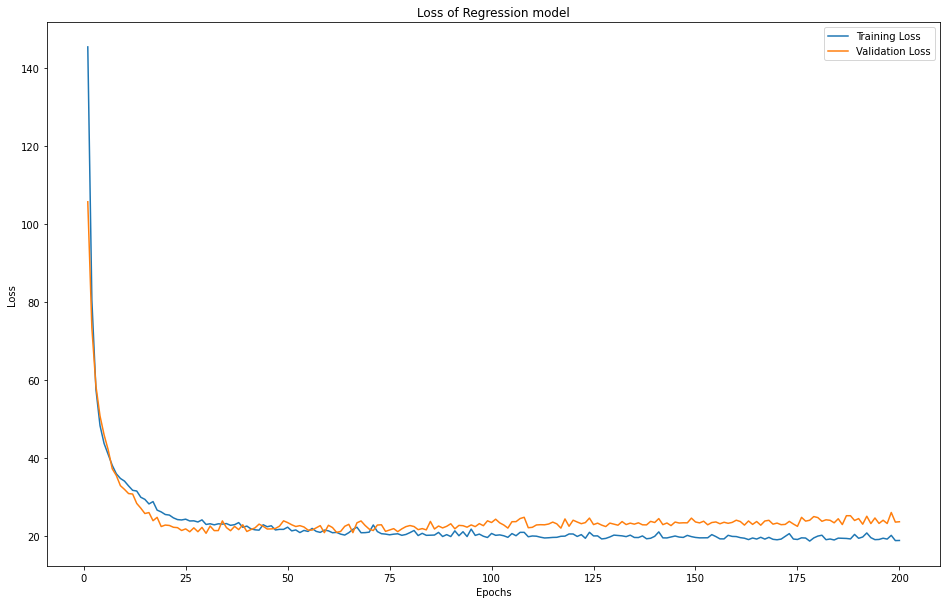

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10)) 
epochs = range(1, len(regression_hist.history['loss']) + 1)
plt.plot(epochs, regression_hist.history['loss'], label='Training Loss') 
plt.plot(epochs, regression_hist.history['val_loss'], label='Validation Loss') 

plt.title('Loss of Regression model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(testX)

[INFO] predicting house prices...


In [20]:
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

In [21]:
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

In [22]:
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(df["price"].mean(), grouping=True),
	locale.currency(df["price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] avg. house price: $533,388.27, std house price: $493,403.08
[INFO] mean: 23.72%, std: 23.34%
